**Data Cleaning and EDA for RAW HOUSE DATA**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/Exploratory-Data-Analysis-EDA-/main/raw_house_data.csv')

In [3]:
data.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844    1707.00  10482.00   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   

   year_built  bedrooms  bathrooms  sqrt_ft  garage  \
0        1941        13       10.0  10500.0     0.0   
1        1997         2        2.0   7300.0     0.0   
2        1997         2        3.0      0.0     0.0   
3        1930         7        5.0   9019.0     4.0   
4        1995         4        6.0   6396.0     3.0   

                                    kitchen_features  fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven         6.0   
1                       Dishwasher, Garbage Disposal         5.0   
2         Dishwasher, Garbage Disposal, Refrigerator         5.0   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...         4.0   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...         5.0   

                 floor_covering   HOA  
0            Mexican Tile, Wood     0  
1          Natural Stone, Other     0  
2    Natural Stone, Other: Rock  None  
3  Ceramic Tile, Laminate, Wood  None  
4              Carpet, Concrete    55

**1. Understanding the Data**

The first and most basic step is to understand the variables in the data set. 

So we must be sure about what type of data is being worked on.

In [4]:
data.shape

(5000, 16)

In [5]:
data.describe()

MLS    sold_price       zipcode    longitude     latitude  \
count  5.000000e+03  5.000000e+03   5000.000000  5000.000000  5000.000000   
mean   2.127070e+07  7.746262e+05  85723.025600  -110.912107    32.308512   
std    2.398508e+06  3.185556e+05     38.061712     0.120629     0.178028   
min    3.042851e+06  1.690000e+05  85118.000000  -112.520168    31.356362   
25%    2.140718e+07  5.850000e+05  85718.000000  -110.979260    32.277484   
50%    2.161469e+07  6.750000e+05  85737.000000  -110.923420    32.318517   
75%    2.180480e+07  8.350000e+05  85749.000000  -110.859078    32.394334   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes  year_built     bedrooms    bathrooms  \
count  4990.000000  5.000000e+03  5000.00000  5000.000000  5000.000000   
mean      4.661317  9.402828e+03  1992.32800     3.933800     3.825300   
std      51.685230  1.729385e+05    65.48614     1.245362     1.392558   
min       0.000000  0.000000e+00     0.00000     1.000000     0.000000   
25%       0.580000  4.803605e+03  1987.00000     3.000000     3.000000   
50%       0.990000  6.223760e+03  1999.00000     4.000000     4.000000   
75%       1.757500  8.082830e+03  2006.00000     4.000000     4.000000   
max    2154.000000  1.221508e+07  2019.00000    36.000000    36.000000   

            sqrt_ft       garage   fireplaces  
count   5000.000000  5000.000000  4975.000000  
mean    3674.743520     2.812200     1.885226  
std     1181.036779     1.196753     1.136578  
min        0.000000     0.000000     0.000000  
25%     3032.000000     2.000000     1.000000  
50%     3499.500000     3.000000     2.000000  
75%     4120.000000     3.000000     3.000000  
max    22408.000000    30.000000     9.000000

In [6]:
data.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [7]:
data.nunique()

MLS                 5000
sold_price          1092
zipcode               56
longitude           4762
latitude            4821
lot_acres            645
taxes               4719
year_built           112
bedrooms              15
bathrooms             20
sqrt_ft             2362
garage                21
kitchen_features    1872
fireplaces            10
floor_covering       311
HOA                  381
dtype: int64

**2. Cleaning the Data**

The next step is to clean the data of redundancies that may be irregularities in some variables or some columns that are not necessary to make our conclusions or interpretations. 

We can just remove them or they are outliers that can cause noise in the data.

In [8]:
data.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [9]:
CleanData = data.drop(['MLS', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'], axis=1)

In [10]:
CleanData.head()

sold_price  year_built  bedrooms  bathrooms  sqrt_ft  garage
0   5300000.0        1941        13       10.0  10500.0     0.0
1   4200000.0        1997         2        2.0   7300.0     0.0
2   4200000.0        1997         2        3.0      0.0     0.0
3   4500000.0        1930         7        5.0   9019.0     4.0
4   3411450.0        1995         4        6.0   6396.0     3.0

**3. Relationship analysis**

Define the correlation matrix to get a broader perspective on what exactly we are dealing with.

In [11]:
Corr = CleanData.corr()

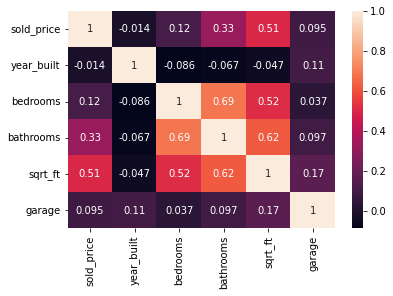

In [12]:
sns.heatmap(Corr, xticklabels=Corr.columns, yticklabels = Corr.columns, annot = True)

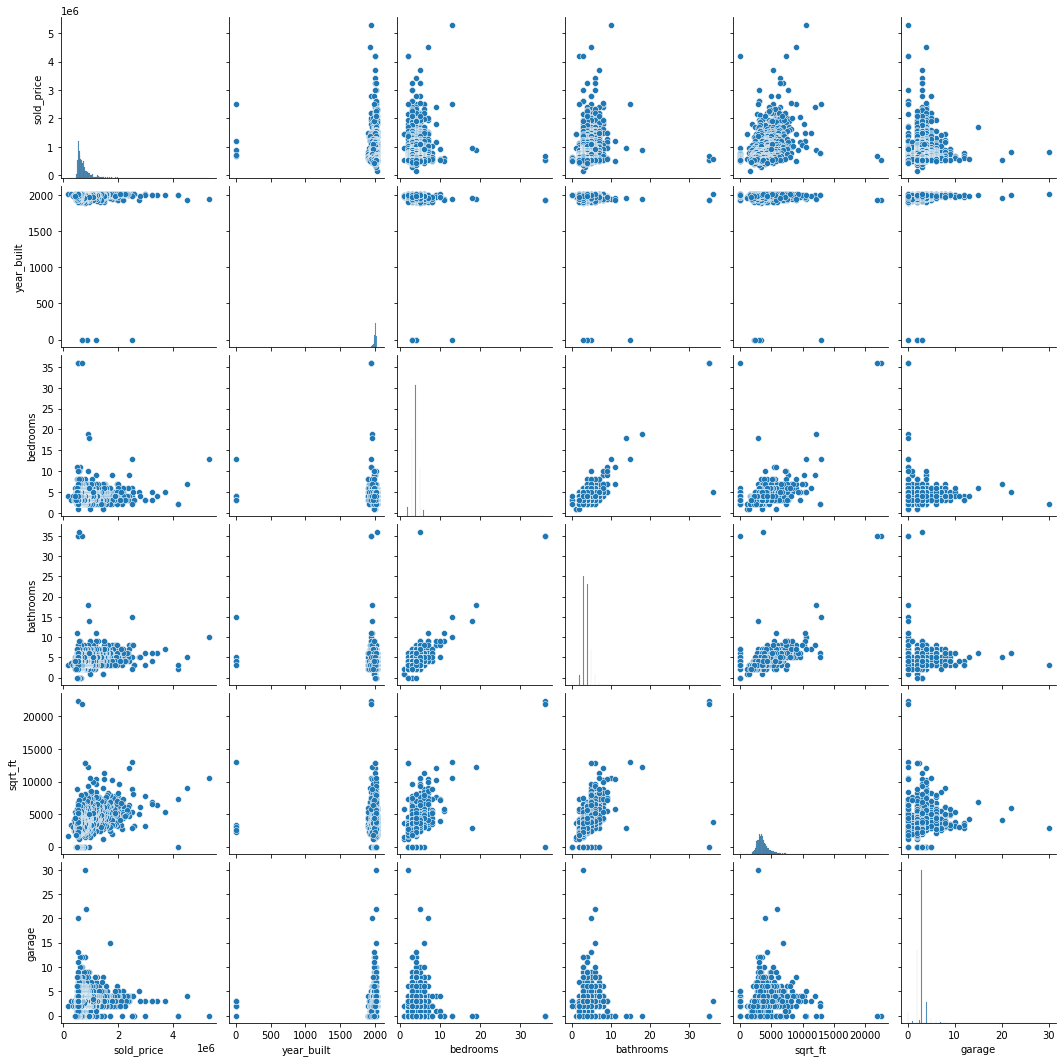

In [13]:
sns.pairplot(CleanData)

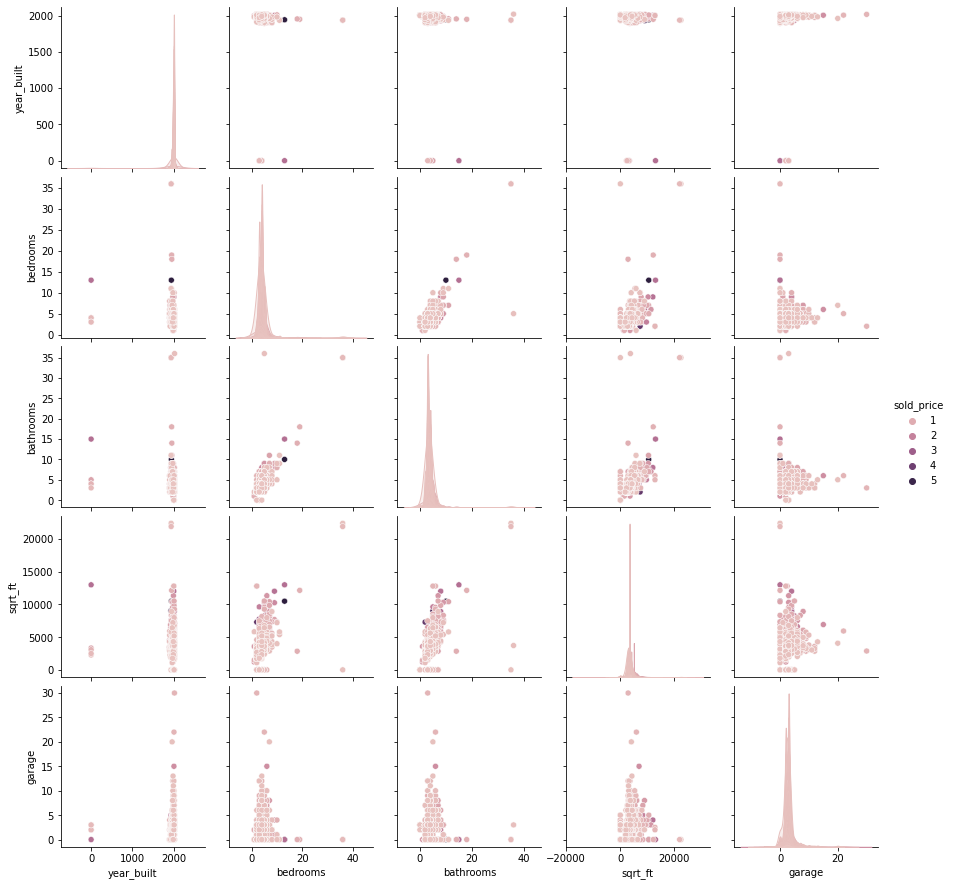

In [14]:
sns.pairplot(CleanData, hue = 'sold_price')